# Laboratorio 2 - Regresión Logistica

Implementación de regresion logistica al dataset "WineQuality" para hacer la predicción de la calidad del vino.
Preprocesamiento del dataset con Pandas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#Libreria pandas y scikitlearn para el preprocesamiento de datasets
import pandas as pd
import sklearn as skl

#1. Contenido del dataset
El contenido del dataset se carga en "dataframe", el cual Panda utilizará como unidad de información.\
A continuación se muestra y describe con un resumen el contenido del dataframe.\
El dataset contiene un total de 32485 casos de vino con los que se puede predecir la calidad analizando los los compuestos del vino. Los datos contienen 12 características.

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/SIS 420/Laboratorio2/Lab2_WineQuality.csv')
print(dataframe)
print(dataframe.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
0                7.4             0.170         0.29             1.4   
1                5.3             0.310         0.38            10.5   
2                4.7             0.145         0.29             1.0   
3                6.9             0.260         0.29             4.2   
4                6.4             0.450         0.07             1.1   
...              ...               ...          ...             ...   
32480            5.0             0.255         0.22             2.7   
32481            6.6             0.360         0.52            11.3   
32482            6.3             0.200         0.24             1.7   
32483            6.2             0.200         0.33             5.4   
32484            8.1             0.280         0.46            15.4   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0          0.047                 23.0                 107.0  0.99390 

#2.Preprocesamiento del dataset

###2.1. Preprocesamiento del dataset: Separar atributos(X) de la etiqueta (y) que se va a usar para el entrenamiento
Los atributos(X) se van a cargar en la variable "dataset" y la etiqueta "y" en la variable "label".

In [ ]:
dataset = dataframe.drop("quality", axis=1)
label = dataframe["quality"].copy()

###2.2. Preprocesamiento del dataset: Atributos con texto -> "Type"
En nuestro dataset tenemos 1 atributo NO NUMÉRICO que es "Type".\
Cargamos en la variable type_cat y lo mostramos.

In [ ]:
type_cat = dataframe[['Type']]
print(type_cat.head(12))

          Type
0   White Wine
1   White Wine
2   White Wine
3   White Wine
4   White Wine
5   White Wine
6   White Wine
7   White Wine
8   White Wine
9   White Wine
10    Red Wine
11  White Wine


###Preprocesamiento con OneHotEncoder de sklearn
Ésto devuelve una codificación donde se indica el número de instancia dentro del dataset, número de atributo binario y el valor.
Con el método toarray() convertimos a una matriz y mostramos sus valores y tamaño (shape).

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
type_cat_one_hot = one_hot_encoder.fit_transform(type_cat)
print(type_cat_one_hot.toarray().shape)
print(type_cat_one_hot.toarray())

(32485, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


###Crear un DataFrame para las características codificadas, concatenar con las características originales y mostrar

In [ ]:
# Crear un DataFrame para las características codificadas
encoded_df = pd.DataFrame(type_cat_one_hot.toarray(), columns=['white_wine', 'red_wine'])

# Concatenar las características originales con las características codificadas
df_nuevo = pd.concat([dataset, encoded_df], axis=1)

# Visualizar el nuevo DataFrame
print(df_nuevo.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.170         0.29             1.4      0.047   
1            5.3             0.310         0.38            10.5      0.031   
2            4.7             0.145         0.29             1.0      0.042   
3            6.9             0.260         0.29             4.2      0.043   
4            6.4             0.450         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                 107.0  0.99390  3.52       0.65   
1                 53.0                 140.0  0.99321  3.34       0.46   
2                 35.0                  90.0  0.99080  3.76       0.49   
3                 33.0                 114.0  0.99020  3.16       0.31   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol        Type  white_wine  red_wine  
0     10.4  White Wine         0.0     

###Eliminar la característica "Type" del df_nuevo

In [ ]:
# Eliminar la característica 'Type' de df_nuevo:
df_nuevo_sin_type = df_nuevo.drop(columns=['Type'])

# Visualizar el nuevo DataFrame sin la característica 'Type'
print(df_nuevo_sin_type.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.170         0.29             1.4      0.047   
1            5.3             0.310         0.38            10.5      0.031   
2            4.7             0.145         0.29             1.0      0.042   
3            6.9             0.260         0.29             4.2      0.043   
4            6.4             0.450         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                 107.0  0.99390  3.52       0.65   
1                 53.0                 140.0  0.99321  3.34       0.46   
2                 35.0                  90.0  0.99080  3.76       0.49   
3                 33.0                 114.0  0.99020  3.16       0.31   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol  white_wine  red_wine  
0     10.4         0.0       1.0  
1     11.7      

###2.3. Adecuar los valores de "quality"  ->  "y"
La calidad del vino está clasificada entre 0 y 8.\
Adecuamos los valores de esta forma:\
0-4 (mala calidad) -> 0\
5-8 (buena calidad) -> 1

In [ ]:
# La serie 'label' contiene los valores de calidad del vino.
# Primero, se crea una función que mapea los valores según nuestras condiciones.
def map_quality(value):
    if value <= 4:
        return 0
    else:
        return 1

# Aplica la función map_quality a la serie 'label'
label_mapped = label.map(map_quality)

# Visualiza los primeros valores de la serie 'label' mapeada
print(label_mapped.head())

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int64


###Concatenamos 'quality' a df_nuevo_sin_type. El DataFrame final es: df_final


In [ ]:
# Previamente ya definimos df_nuevo_sin_type y label_mapped
# Concatenamos 'quality' a df_nuevo_sin_type de la siguiente manera:
df_final = pd.concat([df_nuevo_sin_type, label_mapped], axis=1)

# Visualizar el nuevo DataFrame final
print(df_final.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.170         0.29             1.4      0.047   
1            5.3             0.310         0.38            10.5      0.031   
2            4.7             0.145         0.29             1.0      0.042   
3            6.9             0.260         0.29             4.2      0.043   
4            6.4             0.450         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                 107.0  0.99390  3.52       0.65   
1                 53.0                 140.0  0.99321  3.34       0.46   
2                 35.0                  90.0  0.99080  3.76       0.49   
3                 33.0                 114.0  0.99020  3.16       0.31   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol  white_wine  red_wine  quality  
0     10.4         0.0       1.0        1 

#3. Aplicación de la Regresión Logística

Se crea un modelo de regresión logística para predecir la calidad del vino.

A continuación se cargará los datos y las etiquetas correspondientes.

###3.1. Los datos se dividen en dos partes: Entrenamiento (80% de los ejemplos) y Prueba (20% de los ejemplos)
En pandas, para seleccionar filas y columnas específicas, se utiliza los métodos iloc[] o loc[].\
El método iloc[] se utiliza para seleccionar datos mediante la posición de las filas y columnas en el DataFrame.

In [ ]:
# Cargar datos
# Las doce primeras columnas contienen los compuestos del vino y la columna trece
# contiene la etiqueta que indica si el vino tiene "mala"(0) o "buena"(1) calidad.

# Definir X_train, y_train, X_test, y_test
X_train = df_final.iloc[1:25988, 0:13]
y_train = df_final.iloc[1:25988, 13]
X_test = df_final.iloc[25988:, 0:13]
y_test = df_final.iloc[25988:, 13]

# Visualizar X_train y y_train
print(X_train)
print(y_train)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
1                5.3             0.310         0.38            10.5   
2                4.7             0.145         0.29             1.0   
3                6.9             0.260         0.29             4.2   
4                6.4             0.450         0.07             1.1   
5                8.4             0.320         0.35            11.7   
...              ...               ...          ...             ...   
25983            6.4             0.270         0.49             7.3   
25984            8.3             0.160         0.37             7.9   
25985            9.2             0.310         0.36             2.2   
25986            8.3             0.210         0.49            19.8   
25987            6.7             0.170         0.27             1.4   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1          0.031                 53.0                 140.0  0.99321 

<a id="section1"></a>
### 3.2 Implementacion


### Hipótesis para la regresión logística:

$$ h_\theta(x) = g(\theta^T x)$$

### Función Sigmoidea:

$$g(z) = \frac{1}{1+e^{-z}}$$.

###Definición de la función sigmoidea g:



In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

###Cálculo del valor de la sigmoidea para z=0,  z=0.25,  z=0.5,  z=0.75  y  z=1

In [ ]:
# Prueba la implementacion de la funcion sigmoidea
z = [0, 0.25, 0.5, 0.75,  1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.25, 0.5, 0.75, 1] ) =  [0.5        0.5621765  0.62245933 0.6791787  0.73105858]


###3.3. Normalización de los valores de las características

In [ ]:
import numpy as np

# Los datos preprocesados lo tenemos en el DataFrame llamado df_final. Vamos a normalizar las características (columnas 0 a 12)
X = df_final.iloc[:, 0:13]

# Las etiquetas están en la columna 13 del DataFrame df_final
y = df_final.iloc[:, 13]


def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

<a id="section2"></a>
###3.4. Agregar el término de intersección a X ->  X0 (bias)   con np.ones()

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

<a id="section2"></a>
###3.5. Función de Costo y Gradiente para regresión logística

Función de costo:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

Gradiente del costo: Vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$
<a id="costFunction"></a>

###Definición de la función calcularCosto()

In [ ]:
"""
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J
"""
def calcularCosto(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Término de regularización
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + reg_term

    return J

###Definición de la función descensoGradiente()

In [ ]:
"""
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history
"""
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        reg_term = (lambda_ / m) * theta  # Término de regularización
        reg_term[0] = 0  # No regularizar el término theta0
        theta = theta - (alpha / m) * ((h - y).dot(X) + reg_term)

        J_history.append(calcularCosto(theta, X, y, lambda_))
    return theta, J_history

##Iteraciones:
###alpha = 0.001
###num_iters = 40000
###theta igual a un vector de ceros.

theta calculado por el descenso por el gradiente: [ 2.98868367 -0.06338116 -0.43843403  0.08159915  0.16547587 -0.02269752
  0.2511838   0.01789404 -0.02545182 -0.01192613  0.09917958  0.1964005
  0.22805174 -0.22805174]


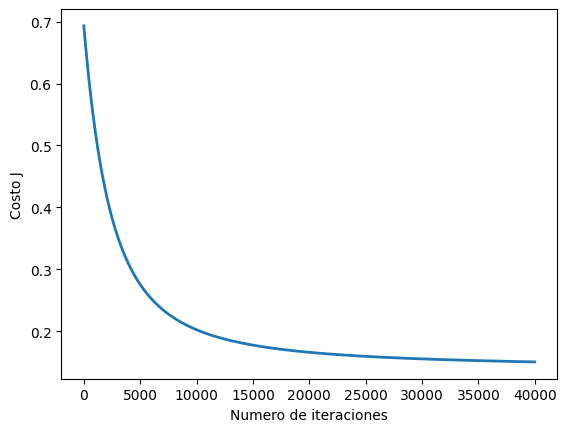

In [37]:
"""
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 40000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
"""
alpha = 0.001
num_iters = 40000
lambda_ = 10                                 #Parámetro de regularización. Valor Inicial: 1

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

####Observación: A partir de 35000 iteraciones, el costo se mantiene cerca de 0.1 por lo cual no es necesario más de 40000 iteraciones.

#4. Procesamiento de los ejemplos de prueba (20% de los datos)

###Impresión de los datos de prueba y los valores de theta previamente calculados

In [38]:
print(X_test)
print('Valores de theta:')
print(theta)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
25988            7.0             0.805         0.00             2.5   
25989            6.7             0.300         0.44            18.5   
25990            5.8             0.280         0.66             9.1   
25991            6.4             0.240         0.49             5.8   
25992            7.4             0.200         0.28             9.1   
...              ...               ...          ...             ...   
32480            5.0             0.255         0.22             2.7   
32481            6.6             0.360         0.52            11.3   
32482            6.3             0.200         0.24             1.7   
32483            6.2             0.200         0.33             5.4   
32484            8.1             0.280         0.46            15.4   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
25988      0.068                  7.0                  20.0  0.99690 

###Visualización de las características y etiqueta para los ejemplos de Prueba:

In [39]:
X_test, y_test = df_final.iloc[25988:, 0:13], df_final.iloc[25988:, 13]
print(X_test)
print(y_test)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
25988            7.0             0.805         0.00             2.5   
25989            6.7             0.300         0.44            18.5   
25990            5.8             0.280         0.66             9.1   
25991            6.4             0.240         0.49             5.8   
25992            7.4             0.200         0.28             9.1   
...              ...               ...          ...             ...   
32480            5.0             0.255         0.22             2.7   
32481            6.6             0.360         0.52            11.3   
32482            6.3             0.200         0.24             1.7   
32483            6.2             0.200         0.33             5.4   
32484            8.1             0.280         0.46            15.4   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
25988      0.068                  7.0                  20.0  0.99690 

###Predicción de la calidad de un vino utilizando la regresión logística (Primer ejemplo del conjunto de prueba)
X_test_norm, mu, sigma = featureNormalize(X_test): Normaliza las características de prueba X_test utilizando la función featureNormalize.\
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1): Agrega una columna de unos (sesgo) al inicio de la matriz de características normalizadas.

In [40]:
# verificar si un vino tiene calidad buena o mala
# X_array = [1, 7.0, 0.805, 0.00, 2.5, 0.068, 7.0, 20, 0.99690, 3.48, 0.56, 9.6, 1.0, 0.0]
X_test_norm, mu, sigma = featureNormalize(X_test)
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)
calidad = sigmoid(np.dot(X_test_norm, theta))   # Se debe cambiar esto
print(calidad)
print('Un vino con los siguientes datos [1, 7.0, 0.805, 0.00, 2.5, 0.068, 7.0, 20, 0.99690, 3.48, 0.56, 9.6, 1.0, 0.0] tiene como probabilidad de tener buena calidad: {:.0f}'.format(calidad[0]))

[0.85097873 0.97472581 0.96292671 ... 0.95949059 0.96985068 0.95487837]
Un vino con los siguientes datos [1, 7.0, 0.805, 0.00, 2.5, 0.068, 7.0, 20, 0.99690, 3.48, 0.56, 9.6, 1.0, 0.0] tiene como probabilidad de tener buena calidad: 1


In [41]:
print(X_test_norm)
#Valores de theta a partir del conjunto de entrenamiento
print(theta)
predict = sigmoid(np.dot(X_test_norm[0], theta))   # Se debe cambiar esto
print(predict)
# print(y_test)

[[ 1.         -0.14898755  2.83334224 ... -0.73254302  1.75309847
  -1.75309847]
 [ 1.         -0.37787668 -0.24026419 ... -1.1497538  -0.57041862
   0.57041862]
 [ 1.         -1.06454406 -0.36199118 ...  0.26876286 -0.57041862
   0.57041862]
 ...
 [ 1.         -0.68306218 -0.84889913 ...  0.26876286 -0.57041862
   0.57041862]
 [ 1.         -0.75935856 -0.84889913 ...  2.52170108 -0.57041862
   0.57041862]
 [ 1.          0.69027258 -0.36199118 ... -1.23319596 -0.57041862
   0.57041862]]
[ 2.98868367 -0.06338116 -0.43843403  0.08159915  0.16547587 -0.02269752
  0.2511838   0.01789404 -0.02545182 -0.01192613  0.09917958  0.1964005
  0.22805174 -0.22805174]
0.8509787266584824


###Predicción para todo el conjunto de prueba

In [42]:
predictions = []

# Iterar sobre cada ejemplo en X_test_norm
for example in X_test_norm:
    # Calcular la predicción para el ejemplo actual
    prediction = sigmoid(np.dot(example, theta))
    # Agregar la predicción a la lista de predicciones
    predictions.append(prediction)

# Convertir la lista de predicciones a un arreglo de numpy
predictions = np.array(predictions)

# Imprimir las predicciones
print(predictions)

[0.85097873 0.97472581 0.96292671 ... 0.95949059 0.96985068 0.95487837]
